In [22]:
import numpy as np
import arviz as az
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

#from src.utils.trace_graphic import *

In [2]:
samples = np.load("../outputs/hyperboloid_samples.npz")

# Variables disponibles
print(list(samples.keys()))

['epsilon', 'kappa', 'tau', 'theta']


In [3]:
tau = np.transpose(samples["tau"], (2, 1, 0))     # (chains, draws, subjects)
kappa = np.transpose(samples["kappa"], (2, 1, 0)) # (chains, draws, subjects)
epsilon = np.transpose(samples["epsilon"], (2, 1, 0))[:, :, 0]  # (chains, draws)

In [4]:
posterior = {
    "epsilon": samples["epsilon"],
    "tau": samples["tau"],
    "kappa": samples["kappa"]
}

In [8]:
print('tau:', samples['tau'].shape)
print('kappa:', samples['kappa'].shape)
print('epsilon:', samples['epsilon'].shape)

tau: (25, 2500, 2)
kappa: (25, 2500, 2)
epsilon: (1, 2500, 2)


In [6]:
posterior = {
    "epsilon": epsilon,
    "tau": tau,
    "kappa": kappa
}

idata = az.from_dict(
    posterior=posterior,
    coords={"subject": range(tau.shape[2])},
    dims={"tau": ["subject"], "kappa": ["subject"]}
)

In [7]:
az.summary(idata, round_to=2)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
epsilon     0.88  0.17    0.56     1.22       0.02     0.01     89.22   
tau[0]      3.84  2.27    0.92     8.15       0.15     0.10    181.65   
tau[1]     11.96  2.49    7.52    16.65       0.17     0.05    203.41   
tau[2]      4.75  2.40    1.04     9.09       0.17     0.10    124.50   
tau[3]     -7.07  2.47  -11.46    -2.98       0.13     0.07    317.02   
tau[4]     -0.18  0.52   -1.04     0.33       0.03     0.08    565.24   
tau[5]     12.08  2.57    7.45    16.97       0.13     0.06    356.91   
tau[6]      6.28  2.42    2.59    10.67       0.13     0.09    290.18   
tau[7]      0.10  0.70   -0.66     1.29       0.06     0.18    390.58   
tau[8]     -0.69  1.37   -3.12     0.19       0.17     0.36    217.52   
tau[9]      0.70  1.38   -0.16     2.38       0.17     0.44    200.53   
tau[10]     0.99  0.78    0.27     1.94       0.07     0.18    316.48   
tau[11]     3.37  2.10    0.70     7.16       0.15     0.16    165.64   
tau[12]     3.87  1.38    1.89     6.58       0.10     0.08    184.43   
tau[13]     6.30  2.37    2.46    10.73       0.15     0.10    238.36   
tau[14]     0.91  1.31    0.05     3.17       0.13     0.30    229.52   
tau[15]     1.44  0.66    0.64     2.61       0.04     0.07    277.19   
tau[16]    -1.22  1.08   -2.96    -0.31       0.11     0.22    143.21   
tau[17]     5.88  2.60    1.60    10.50       0.17     0.09    167.60   
tau[18]     2.56  2.30    0.26     7.18       0.23     0.17     84.36   
tau[19]     0.80  0.49    0.27     1.48       0.03     0.06    327.32   
tau[20]     4.37  2.20    1.27     8.72       0.14     0.09    175.45   
tau[21]     4.21  2.17    0.86     8.14       0.12     0.07    274.40   
tau[22]     6.31  2.53    2.21    11.18       0.15     0.07    231.72   
tau[23]     6.07  2.44    2.10    10.74       0.17     0.08    142.23   
tau[24]     1.78  1.75    0.34     5.13       0.20     0.31    128.21   
kappa[0]    0.19  0.23    0.01     0.59       0.02     0.03    143.75   
kappa[1]    4.82  2.88    0.43    10.02       0.05     0.04   3636.65   
kappa[2]    0.19  0.37    0.02     0.46       0.06     0.16     91.39   
kappa[3]    1.28  1.89    0.06     4.59       0.11     0.20    328.03   
kappa[4]    3.27  3.05    0.00     9.02       0.07     0.05    893.59   
kappa[5]    3.69  2.87    0.19     9.16       0.06     0.05   2176.35   
kappa[6]    0.90  1.42    0.04     3.65       0.11     0.17    227.41   
kappa[7]    3.18  3.06    0.00     8.92       0.09     0.05    518.95   
kappa[8]    2.94  3.01    0.00     8.59       0.11     0.06    203.91   
kappa[9]    2.69  2.88    0.00     8.14       0.09     0.05    232.45   
kappa[10]   2.82  2.86    0.02     8.22       0.10     0.07    359.76   
kappa[11]   0.40  0.82    0.01     1.35       0.07     0.20    151.56   
kappa[12]   2.94  2.79    0.08     8.33       0.12     0.08    399.74   
kappa[13]   0.20  0.15    0.03     0.46       0.01     0.01    305.05   
kappa[14]   2.52  2.83    0.01     7.91       0.11     0.07    221.88   
kappa[15]   2.88  2.76    0.04     8.20       0.09     0.07    562.17   
kappa[16]   3.08  2.94    0.02     8.51       0.11     0.06    280.19   
kappa[17]   0.25  0.35    0.02     0.67       0.05     0.10    141.55   
kappa[18]   0.64  1.52    0.01     2.68       0.21     0.48     79.11   
kappa[19]   3.40  2.95    0.03     8.84       0.09     0.06    633.97   
kappa[20]   0.17  0.16    0.02     0.42       0.01     0.03    212.64   
kappa[21]   0.15  0.17    0.02     0.42       0.01     0.02    284.97   
kappa[22]   0.12  0.11    0.02     0.27       0.01     0.03    188.13   
kappa[23]   0.31  0.43    0.04     0.88       0.07     0.11     62.57   
kappa[24]   1.79  2.48    0.01     6.65       0.17     0.16    112.75   

           ess_tail  r_hat  
epsilon      187.02   1.01  
tau[0]       298.75   1.00  
tau[1]       606.91   1.00  
tau[2]        54.33   1.02  
tau[3]       565.46   1.00  
tau[4]       505.61   1.00  
tau[5]      

In [9]:
az.style.use("arviz-doc")

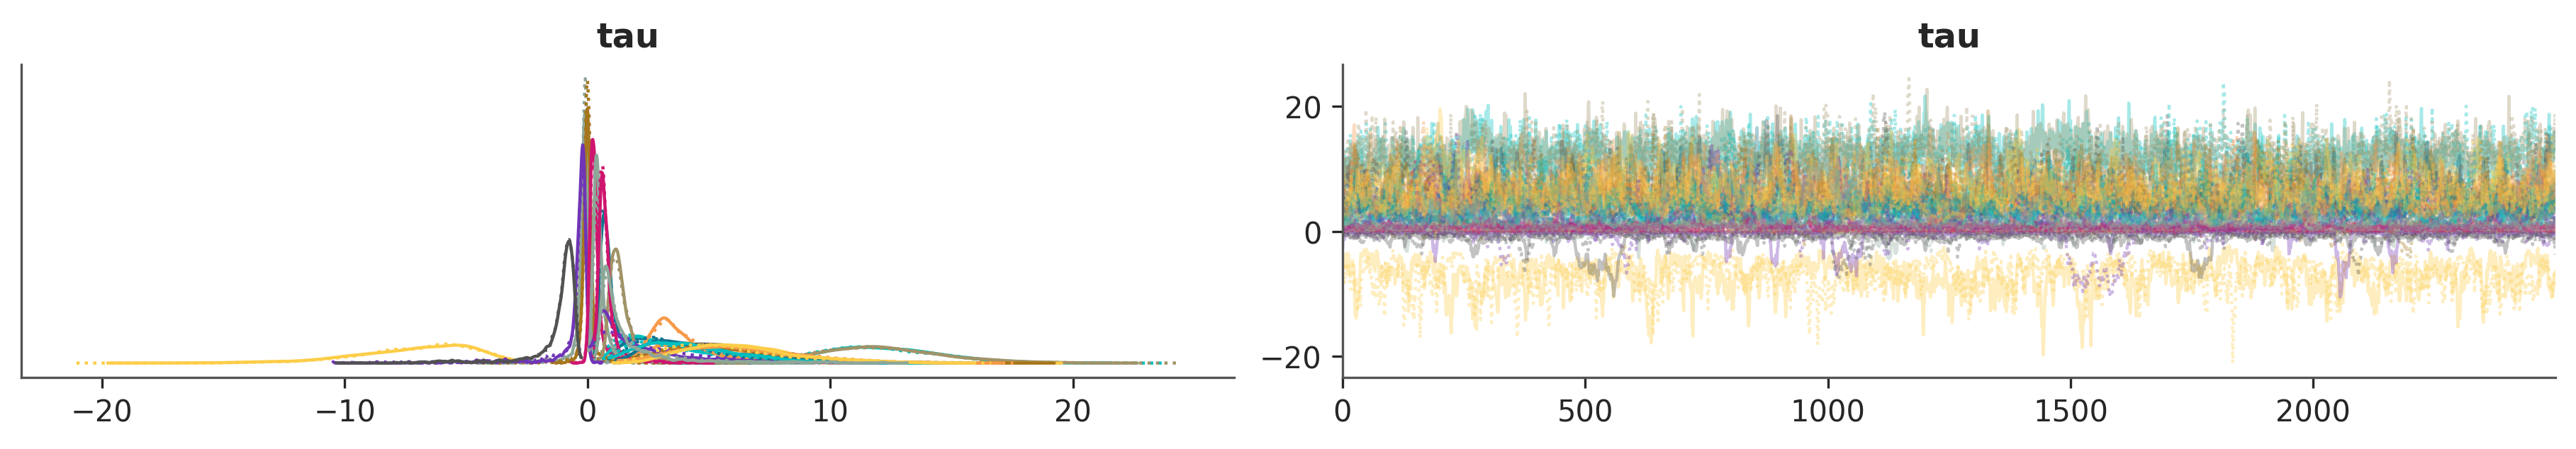

In [10]:
az.plot_trace(posterior, var_names=("tau"))
plt.show()

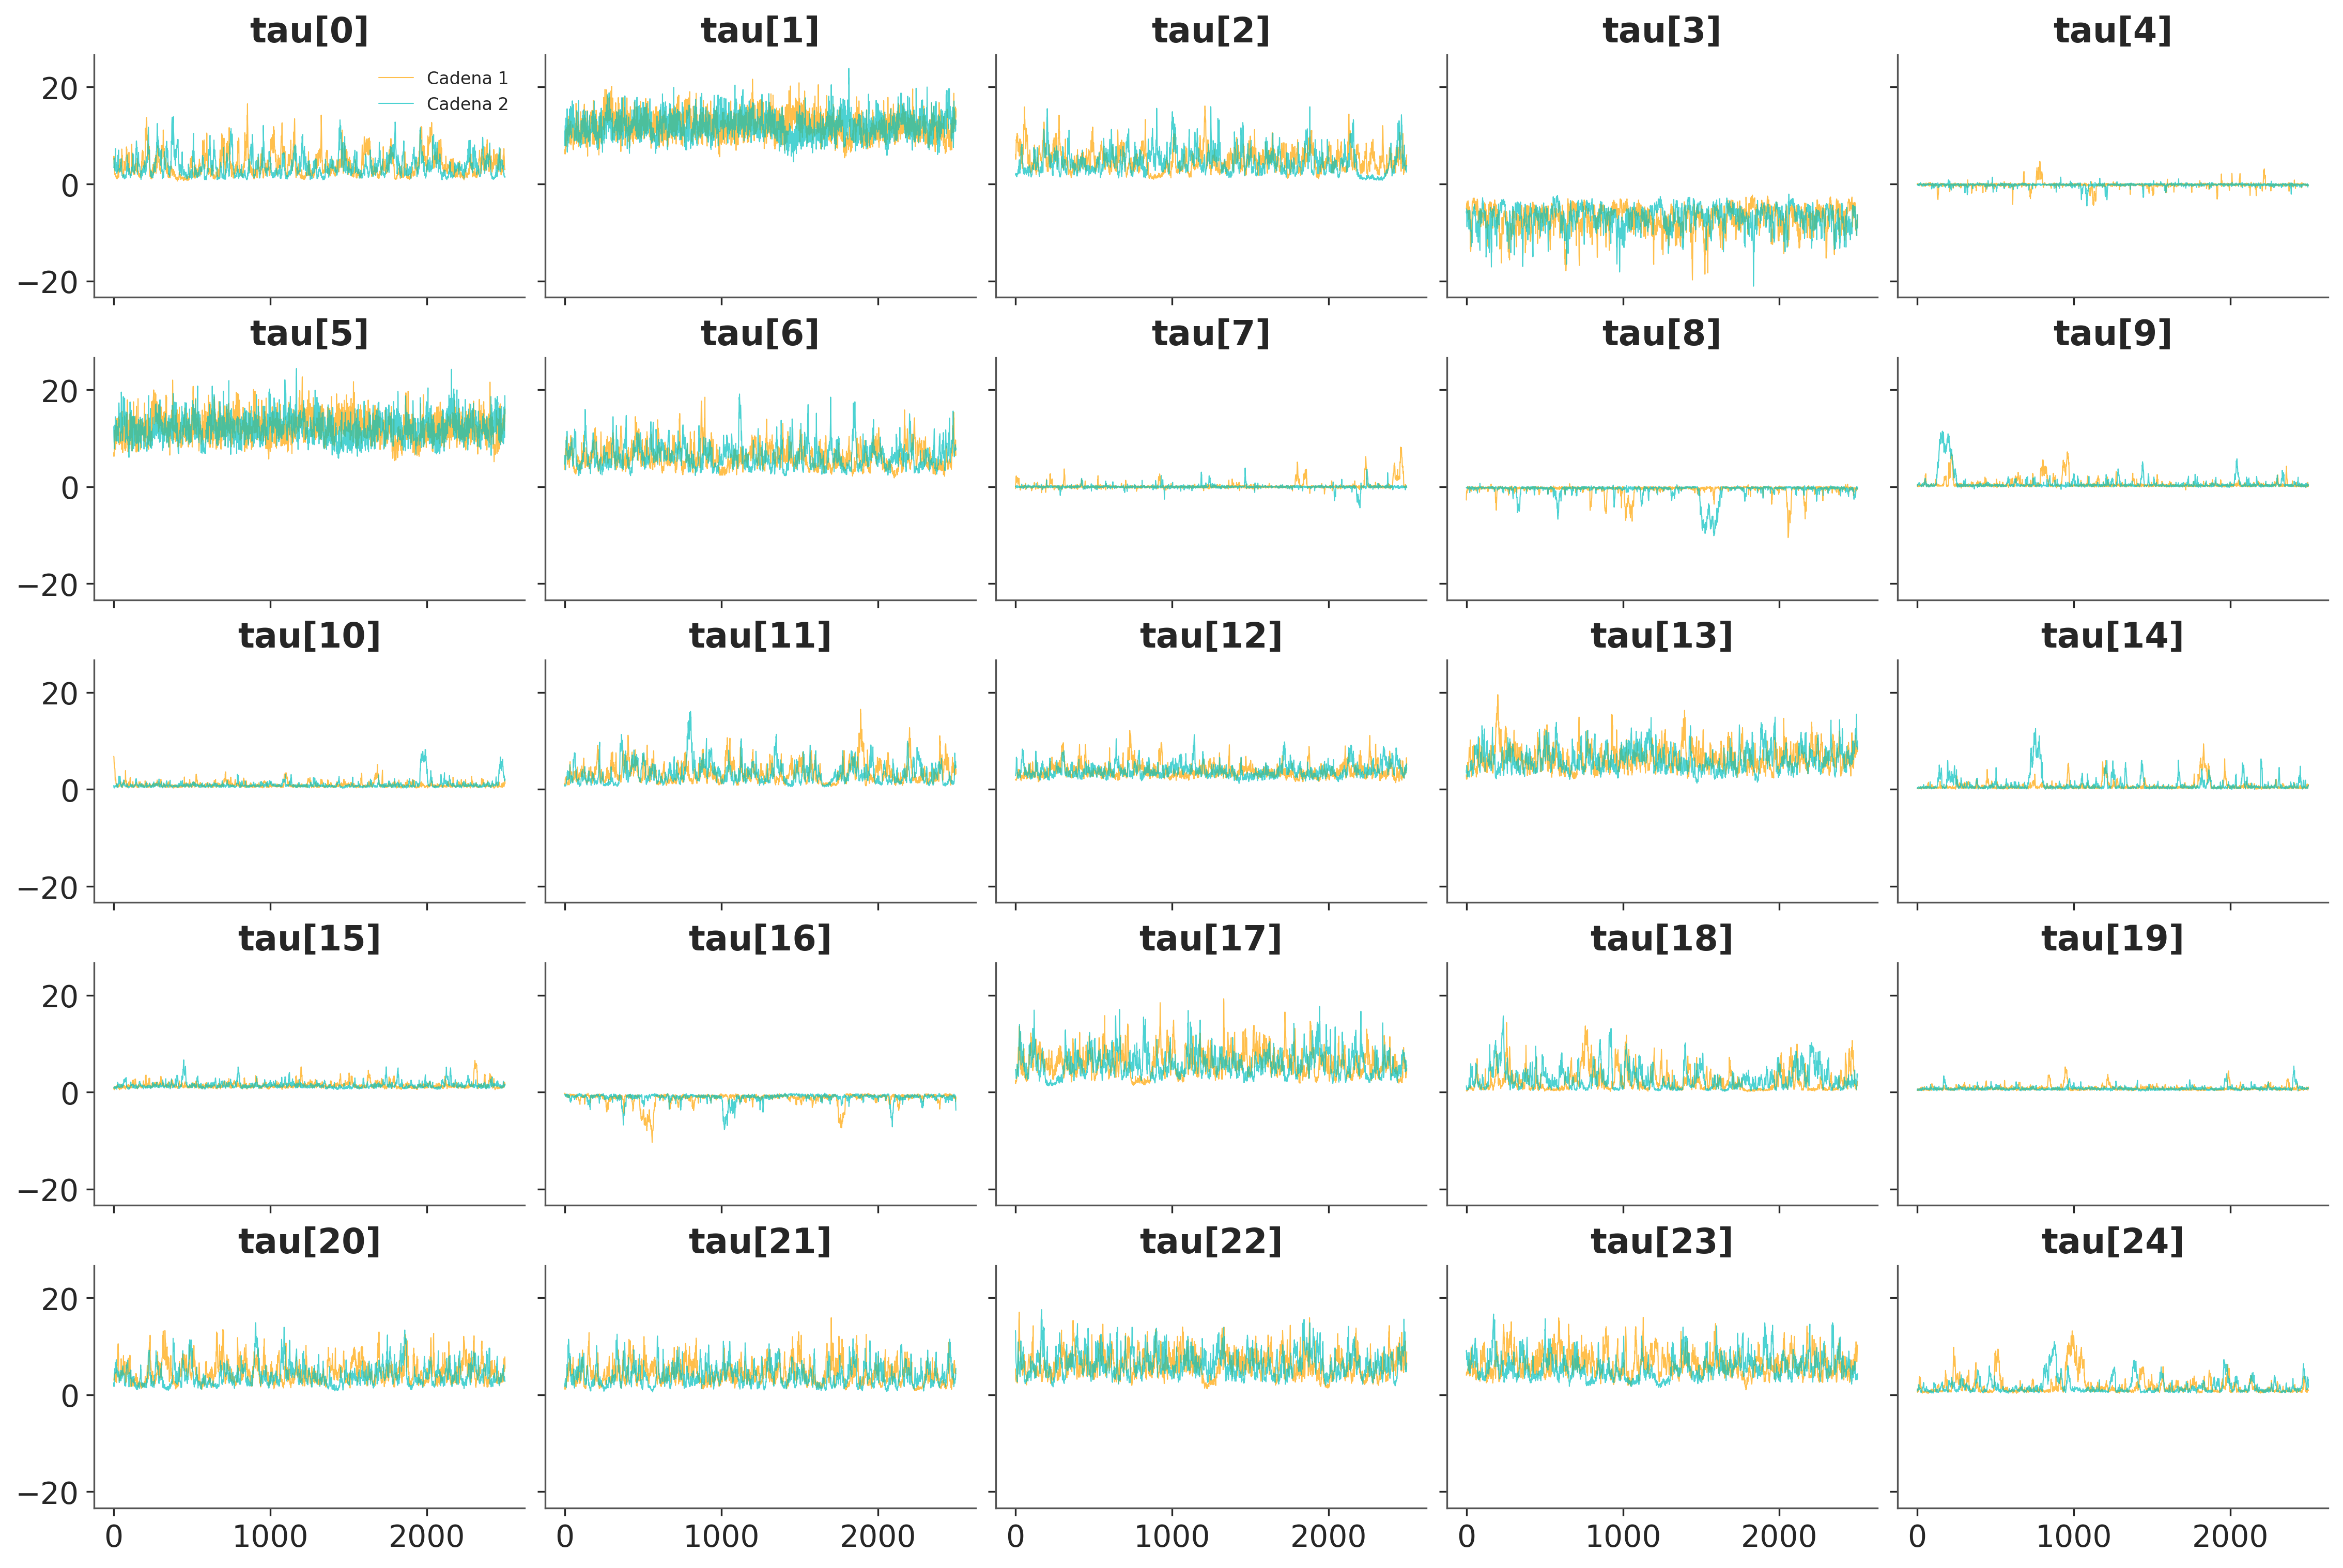

In [18]:
plot_trace_grid(idata, "tau", ncols=5)

In [16]:
#az.plot_autocorr(idata, var_names=["kappa"]);
#plt.show()

In [17]:
#az.plot_rank(idata, var_names=["epsilon"]);
#plt.show()

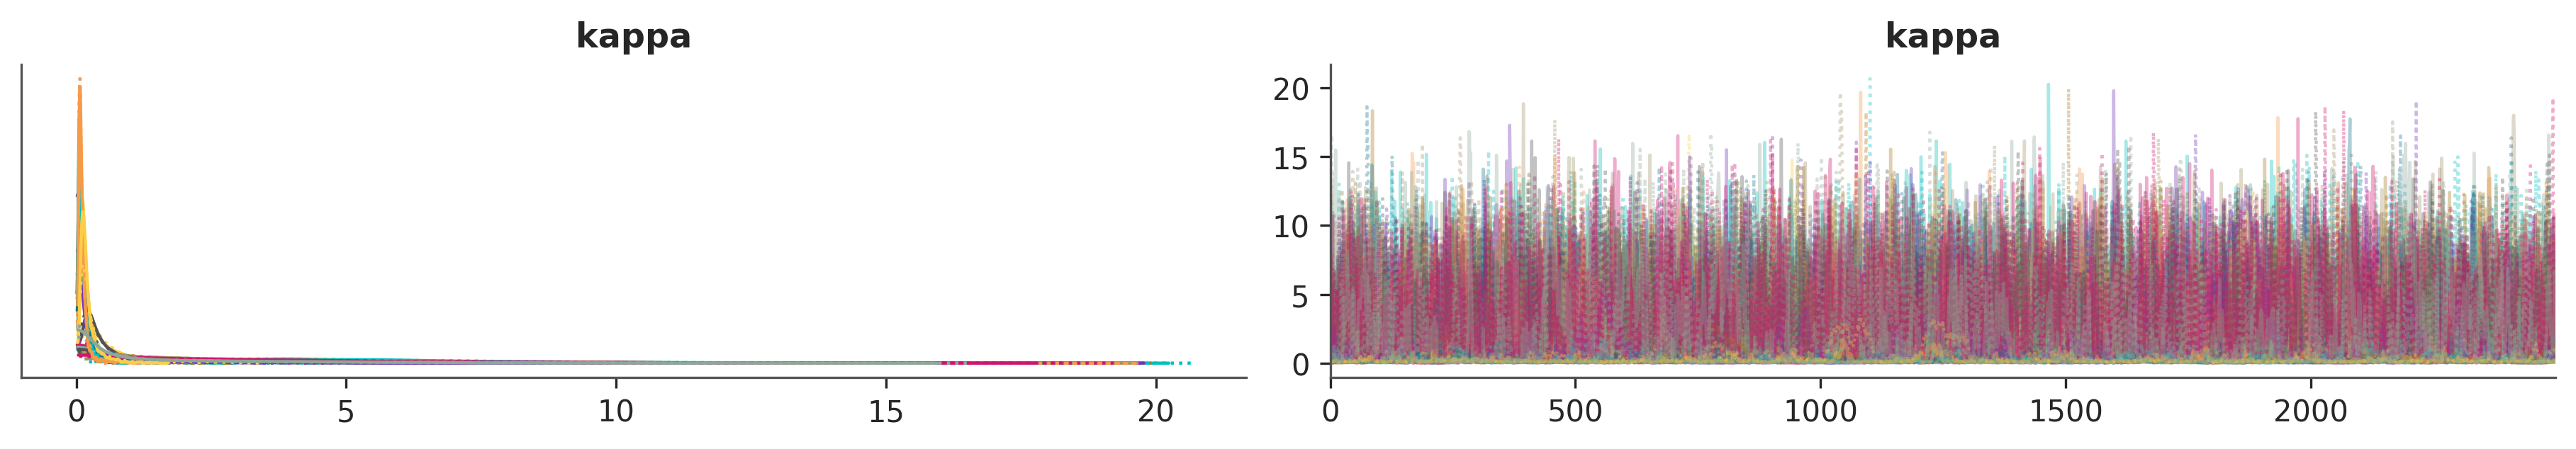

In [19]:
az.plot_trace(posterior, var_names=("kappa"))
plt.show()

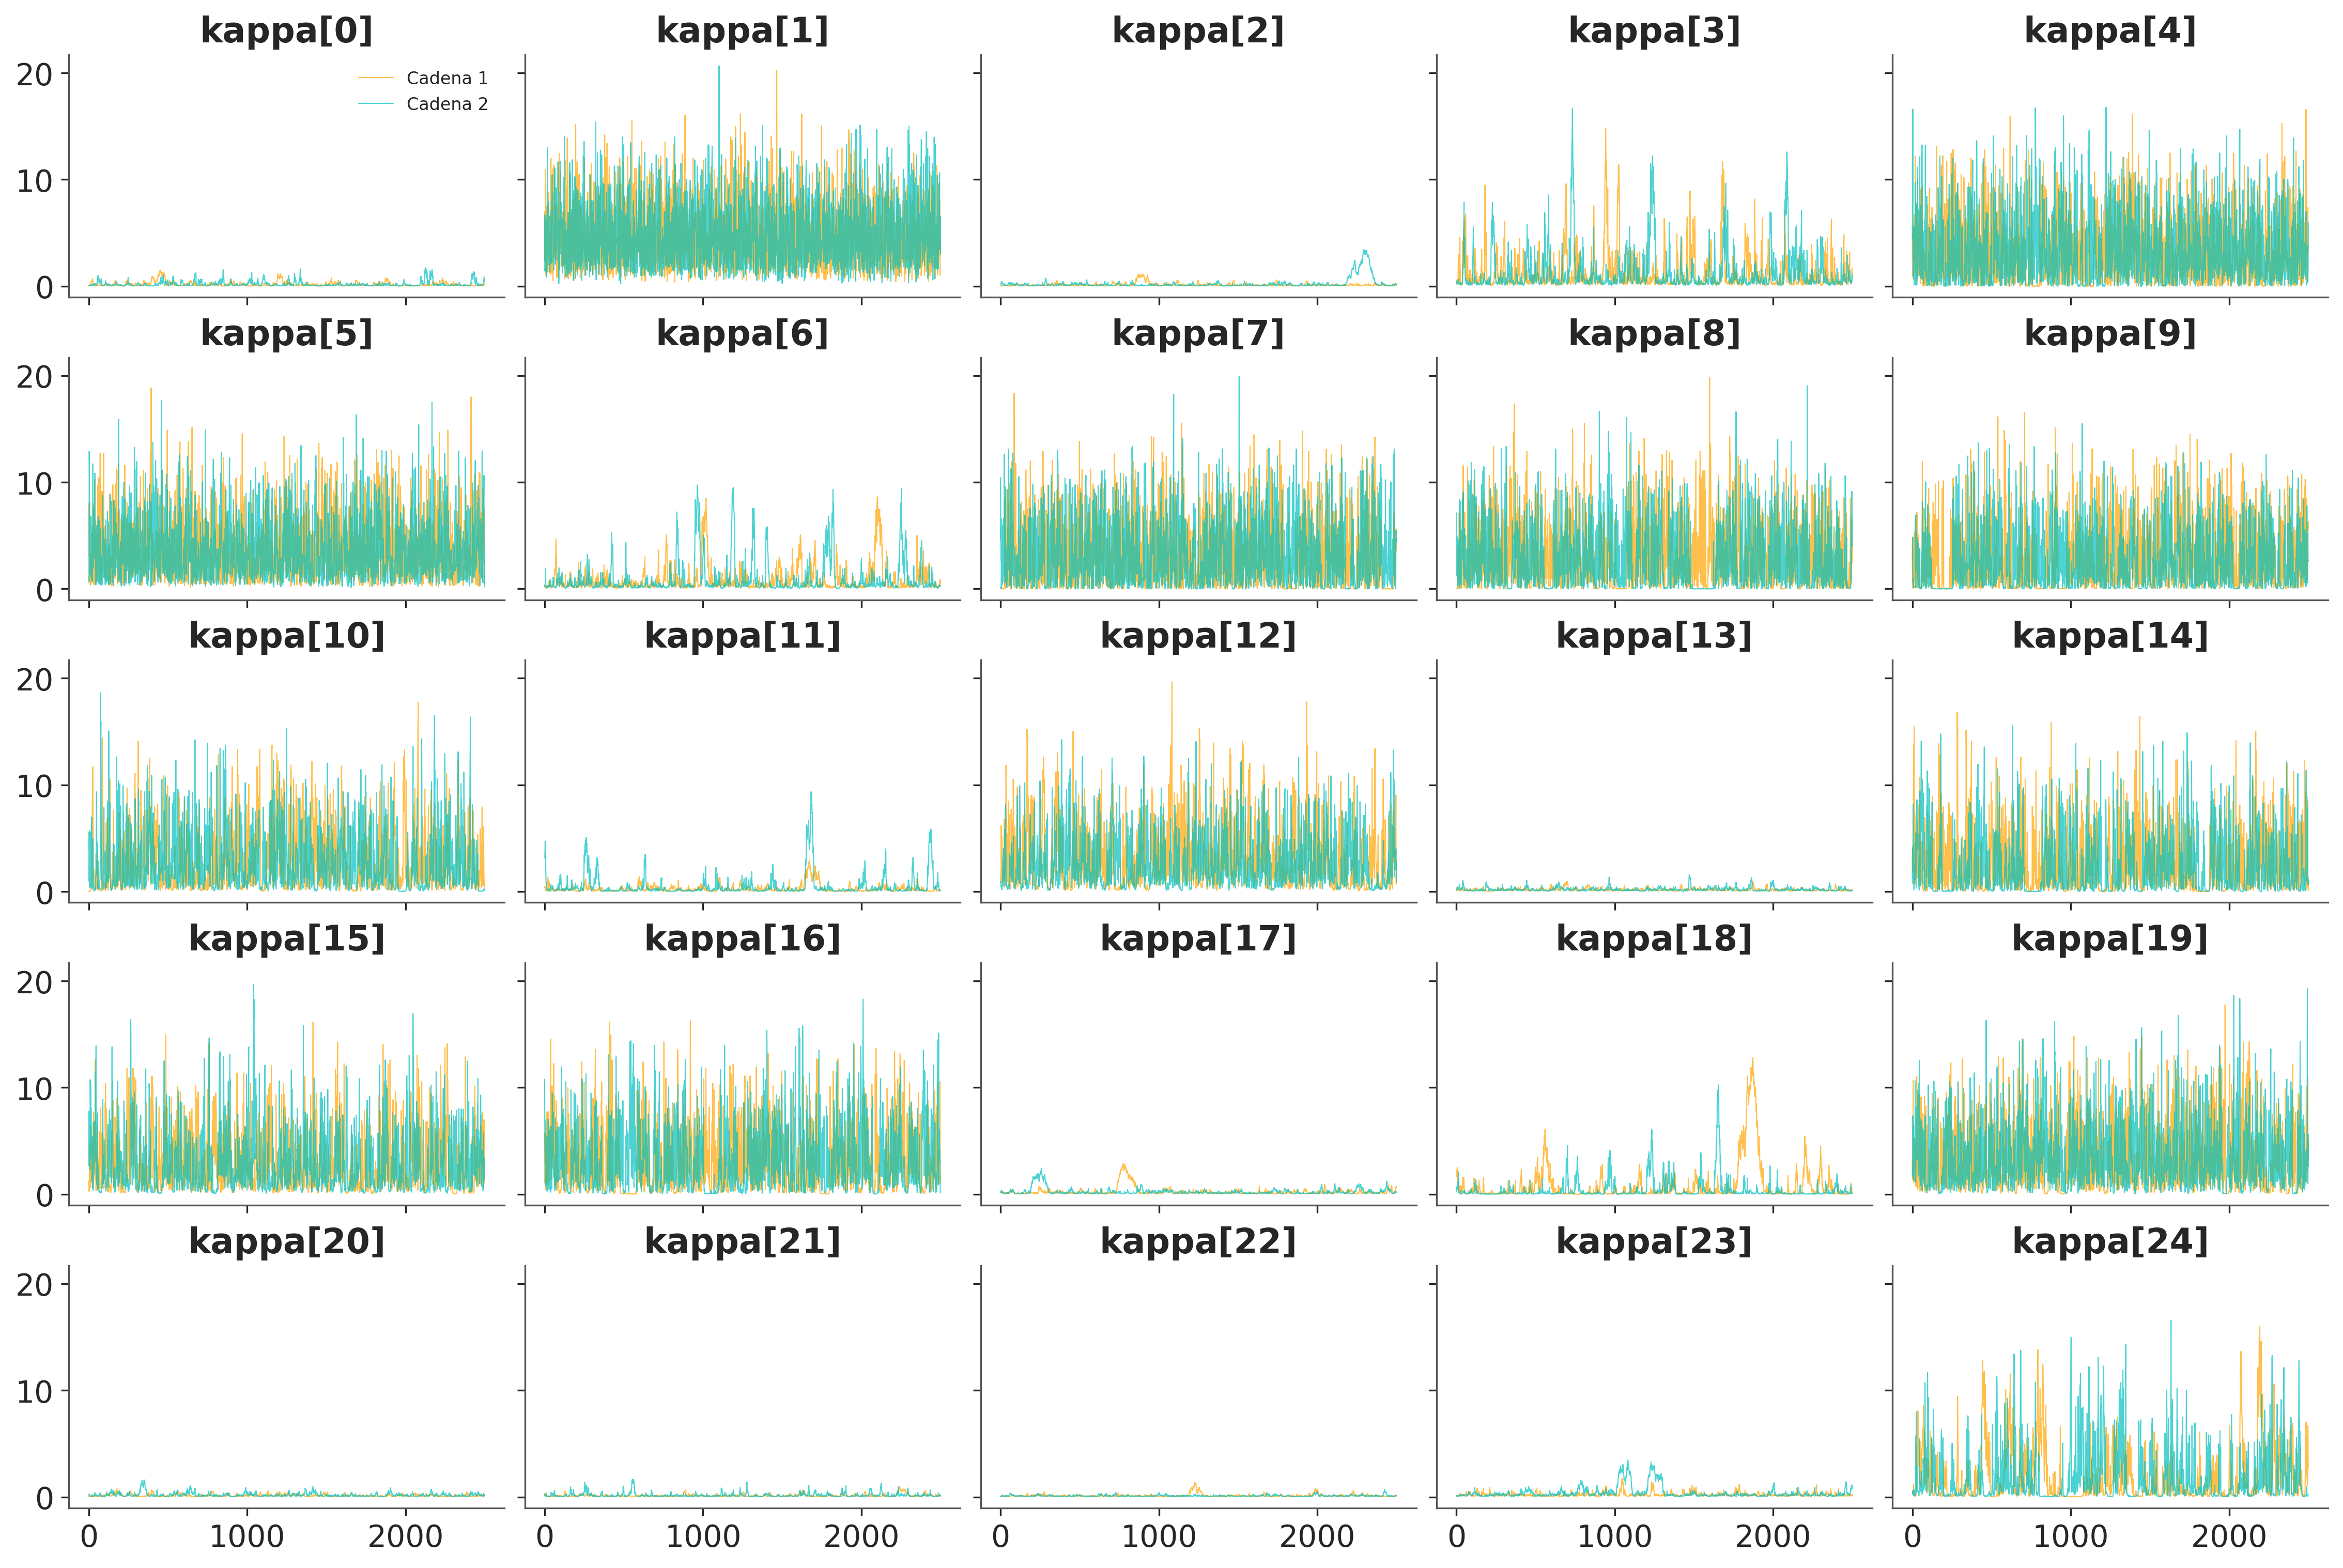

In [20]:
plot_trace_grid(idata, "kappa", ncols=5)

In [28]:
# Posterior de tau con KDE
#plot_posterior_grid(idata, "tau", ncols=5, kind="kde")

In [29]:
# Posterior de kappa con histogramas
#plot_posterior_grid(idata, "kappa", ncols=5, kind="hist")